In [1]:
%matplotlib inline
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
from glob import glob 
import matplotlib.pyplot as plt
import os
import pandas as pd
import seaborn as sns
all_xray_df = pd.read_csv('../input/data/Data_Entry_2017.csv')
all_xray_df.sample(5)

Image Index             Finding Labels  Follow-up #  Patient ID  \
5071   00001365_001.png                 No Finding            1        1365   
86678  00021377_005.png               Infiltration            5       21377   
11089  00002874_001.png                 No Finding            1        2874   
1123   00000275_001.png  Atelectasis|Consolidation            1         275   
53424  00013491_007.png                 No Finding            7       13491   

       Patient Age Patient Gender View Position  OriginalImage[Width  Height]  \
5071            13              F            PA                 2048     2500   
86678           52              M            PA                 2992     2991   
11089           55              M            PA                 2992     2991   
1123            60              F            AP                 3056     2544   
53424           58              M            PA                 2992     2991   

       OriginalImagePixelSpacing[x     y]  Unnamed: 11  
5071                         0.171  0.171          NaN  
86678                        0.143  0.143          NaN  
11089                        0.143  0.143          NaN  
1123                         0.139  0.139          NaN  
53424                        0.143  0.143          NaN

In [2]:
all_xray_df['Finding Labels'].values

array(['Cardiomegaly', 'Cardiomegaly|Emphysema', 'Cardiomegaly|Effusion',
       ..., 'No Finding', 'No Finding', 'No Finding'], dtype=object)

In [3]:
# all_xray_df['Finding Labels'].values.tolist()

In [4]:
# set(all_xray_df['Finding Labels'].values.tolist())

In [5]:
len(set(all_xray_df['Finding Labels'].values.tolist()))

836

In [6]:
all_xray_df['Finding Labels'].value_counts()[:15]

No Finding                  60361
Infiltration                 9547
Atelectasis                  4215
Effusion                     3955
Nodule                       2705
Pneumothorax                 2194
Mass                         2139
Effusion|Infiltration        1603
Atelectasis|Infiltration     1350
Consolidation                1310
Atelectasis|Effusion         1165
Pleural_Thickening           1126
Cardiomegaly                 1093
Emphysema                     892
Infiltration|Nodule           829
Name: Finding Labels, dtype: int64

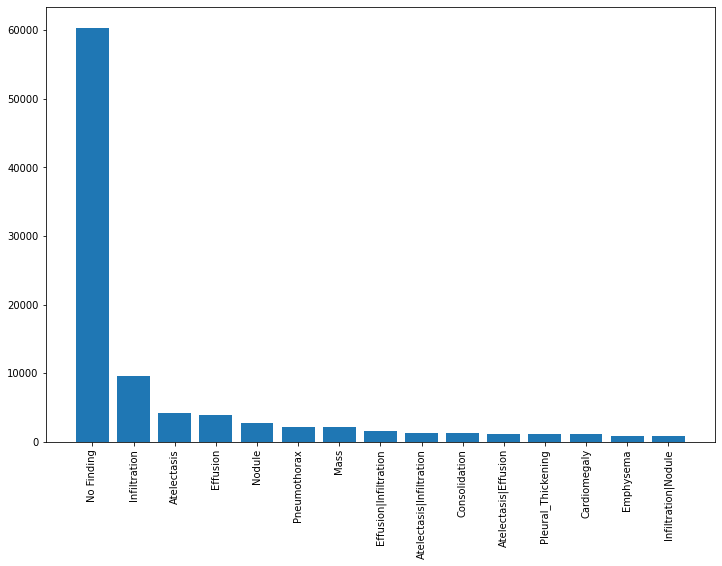

In [7]:
label_counts = all_xray_df['Finding Labels'].value_counts()[:15]
fig, ax1 = plt.subplots(1, 1,figsize = (12, 8))
ax1.bar(np.arange(len(label_counts)) + 0.5, label_counts)
ax1.set_xticks(np.arange(len(label_counts)) + 0.5)
_ = ax1.set_xticklabels(label_counts.index, rotation = 90)

In [8]:
all_xray_df = pd.read_csv('../input/data/Data_Entry_2017.csv')
all_image_paths = {os.path.basename(x): x for x in 
                   glob(os.path.join('..', 'input', 'data',  'images*', '*', '*.png'))}
print('Scans found:', len(all_image_paths), ', Total Headers', all_xray_df.shape[0])
all_xray_df['path'] = all_xray_df['Image Index'].map(all_image_paths.get)
all_xray_df['No Finding'] = all_xray_df['Finding Labels'].map(lambda x: 'No Finding' in x)
all_xray_df['Patient Age'] = np.clip(all_xray_df['Patient Age'], 5, 100)
all_xray_df['Patient Male'] = all_xray_df['Patient Gender'].map(lambda x: x.upper() == 'M').astype('float32')
print('The number of samples:', len(all_xray_df))
all_xray_df.sample(5)

Scans found: 112120 , Total Headers 112120
The number of samples: 112120


Image Index Finding Labels  Follow-up #  Patient ID  Patient Age  \
14495  00003768_003.png     No Finding            3        3768           35   
6707   00001804_001.png     No Finding            1        1804            9   
18116  00004850_003.png     No Finding            3        4850           52   
67952  00016786_004.png  Consolidation            4       16786           23   
89616  00022248_001.png     No Finding            1       22248           35   

      Patient Gender View Position  OriginalImage[Width  Height]  \
14495              F            PA                 2048     2500   
6707               F            PA                 2048     2500   
18116              F            PA                 2048     2500   
67952              F            AP                 3056     2544   
89616              F            PA                 2992     2991   

       OriginalImagePixelSpacing[x     y]  Unnamed: 11  \
14495                        0.171  0.171          NaN   
6707                         0.168  0.168          NaN   
18116                        0.168  0.168          NaN   
67952                        0.139  0.139          NaN   
89616                        0.143  0.143          NaN   

                                                   path  No Finding  \
14495  ../input/data/images_002/images/00003768_003.png        True   
6707   ../input/data/images_002/images/00001804_001.png        True   
18116  ../input/data/images_003/images/00004850_003.png        True   
67952  ../input/data/images_008/images/00016786_004.png       False   
89616  ../input/data/images_010/images/00022248_001.png        True   

       Patient Male  
14495           0.0  
6707            0.0  
18116           0.0  
67952           0.0  
89616           0.0

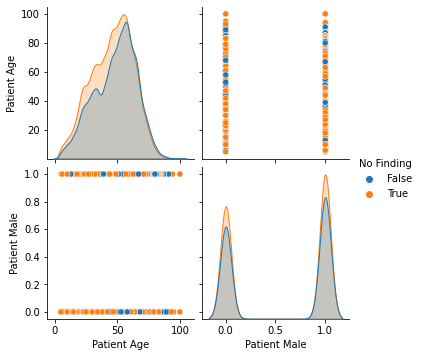

In [9]:
sns.pairplot(all_xray_df[['Patient Age', 'Patient Male', 'No Finding']], hue = 'No Finding')

In [10]:
bbox_list_df = pd.read_csv('/kaggle/input/data/BBox_List_2017.csv')
bbox_list_df.head(5)

Image Index Finding Label     Bbox [x           y           w  \
0  00013118_008.png   Atelectasis  225.084746  547.019217   86.779661   
1  00014716_007.png   Atelectasis  686.101695  131.543498  185.491525   
2  00029817_009.png   Atelectasis  221.830508  317.053115  155.118644   
3  00014687_001.png   Atelectasis  726.237288  494.951420  141.016949   
4  00017877_001.png   Atelectasis  660.067797  569.780787  200.677966   

           h]  Unnamed: 6  Unnamed: 7  Unnamed: 8  
0   79.186441         NaN         NaN         NaN  
1  313.491525         NaN         NaN         NaN  
2  216.949153         NaN         NaN         NaN  
3   55.322034         NaN         NaN         NaN  
4   78.101695         NaN         NaN         NaN

In [11]:
len(bbox_list_df)

984

In [12]:
# bbox_list_df['Finding Label'].values

In [13]:
# bbox_list_df['Finding Label'].values.tolist()

In [14]:
set(bbox_list_df['Finding Label'].values.tolist())

{'Atelectasis',
 'Cardiomegaly',
 'Effusion',
 'Infiltrate',
 'Mass',
 'Nodule',
 'Pneumonia',
 'Pneumothorax'}

In [15]:
len(set(bbox_list_df['Finding Label'].values.tolist()))

8

In [16]:
bbox_list_df['Finding Label'].value_counts()

Atelectasis     180
Effusion        153
Cardiomegaly    146
Infiltrate      123
Pneumonia       120
Pneumothorax     98
Mass             85
Nodule           79
Name: Finding Label, dtype: int64

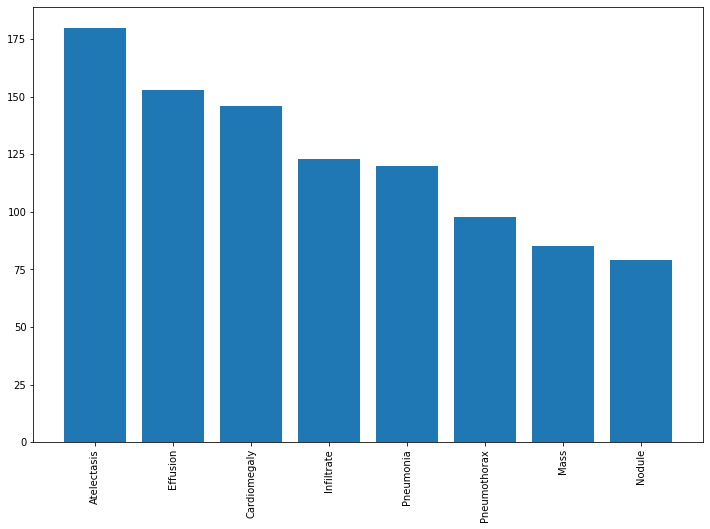

In [17]:
label_counts = bbox_list_df['Finding Label'].value_counts()
fig, ax1 = plt.subplots(1, 1,figsize = (12, 8))
ax1.bar(np.arange(len(label_counts)) + 0.5, label_counts)
ax1.set_xticks(np.arange(len(label_counts)) + 0.5)
_ = ax1.set_xticklabels(label_counts.index, rotation = 90)

In [18]:
A = all_xray_df.set_index('Image Index')
A

Finding Labels  Follow-up #  Patient ID  \
Image Index                                                         
00000001_000.png            Cardiomegaly            0           1   
00000001_001.png  Cardiomegaly|Emphysema            1           1   
00000001_002.png   Cardiomegaly|Effusion            2           1   
00000002_000.png              No Finding            0           2   
00000003_000.png                  Hernia            0           3   
...                                  ...          ...         ...   
00030801_001.png          Mass|Pneumonia            1       30801   
00030802_000.png              No Finding            0       30802   
00030803_000.png              No Finding            0       30803   
00030804_000.png              No Finding            0       30804   
00030805_000.png              No Finding            0       30805   

                  Patient Age Patient Gender View Position  \
Image Index                                                  
00000001_000.png           58              M            PA   
00000001_001.png           58              M            PA   
00000001_002.png           58              M            PA   
00000002_000.png           81              M            PA   
00000003_000.png           81              F            PA   
...                       ...            ...           ...   
00030801_001.png           39              M            PA   
00030802_000.png           29              M            PA   
00030803_000.png           42              F            PA   
00030804_000.png           30              F            PA   
00030805_000.png           27              M            PA   

                  OriginalImage[Width  Height]  OriginalImagePixelSpacing[x  \
Image Index                                                                   
00000001_000.png                 2682     2749                        0.143   
00000001_001.png                 2894     2729                        0.143   
00000001_002.png                 2500     2048                        0.168   
00000002_000.png                 2500     2048                        0.171   
00000003_000.png                 2582     2991                        0.143   
...                               ...      ...                          ...   
00030801_001.png                 2048     2500                        0.168   
00030802_000.png                 2048     2500                        0.168   
00030803_000.png                 2048     2500                        0.168   
00030804_000.png                 2048     2500                        0.168   
00030805_000.png                 2048     2500                        0.171   

                     y]  Unnamed: 11  \
Image Index                            
00000001_000.png  0.143          NaN   
00000001_001.png  0.143          NaN   
00000001_002.png  0.168          NaN   
00000002_000.png  0.171          NaN   
00000003_000.png  0.143          NaN   
...                 ...          ...   
00030801_001.png  0.168          NaN   
00030802_000.png  0.168          NaN   
00030803_000.png  0.168          NaN   
00030804_000.png  0.168          NaN   
00030805_000.png  0.171          NaN   

                                                              path  \
Image Index                                                          
00000001_000.png  ../input/data/images_001/images/00000001_000.png   
00000001_001.png  ../input/data/images_001/images/00000001_001.png   
00000001_002.png  ../input/data/images_001/images/00000001_002.png   
00000002_000.png  ../input/data/images_001/images/00000002_000.png   
00000003_000.png  ../input/data/images_001/images/00000003_000.png   
...                                                            ...   
00030801_001.png  ../input/data/images_012/images/00030801_001.png   
00030802_000.png  ../input/data/images_012/images/00030802_000.png   
00030803_000.png  ../input/data/images_012/images/00030803_000.png   
00

In [19]:
B = bbox_list_df.set_index('Image Index')
B

Finding Label     Bbox [x           y           w  \
Image Index                                                          
00013118_008.png   Atelectasis  225.084746  547.019217   86.779661   
00014716_007.png   Atelectasis  686.101695  131.543498  185.491525   
00029817_009.png   Atelectasis  221.830508  317.053115  155.118644   
00014687_001.png   Atelectasis  726.237288  494.951420  141.016949   
00017877_001.png   Atelectasis  660.067797  569.780787  200.677966   
...                        ...         ...         ...         ...   
00029464_015.png   Atelectasis  198.940451  352.900747  615.537778   
00025769_001.png   Atelectasis  701.838229  572.491858  103.537778   
00016837_002.png   Atelectasis  140.913785  658.962969  271.928889   
00020124_003.png   Atelectasis  175.047118  580.456302  244.622222   
00026920_000.png   Atelectasis  343.438229  446.198524  120.604444   

                          h]  Unnamed: 6  Unnamed: 7  Unnamed: 8  
Image Index                                                       
00013118_008.png   79.186441         NaN         NaN         NaN  
00014716_007.png  313.491525         NaN         NaN         NaN  
00029817_009.png  216.949153         NaN         NaN         NaN  
00014687_001.png   55.322034         NaN         NaN         NaN  
00017877_001.png   78.101695         NaN         NaN         NaN  
...                      ...         ...         ...         ...  
00029464_015.png  323.128889         NaN         NaN         NaN  
00025769_001.png   63.715556         NaN         NaN         NaN  
00016837_002.png   94.435556         NaN         NaN         NaN  
00020124_003.png  103.537778         NaN         NaN         NaN  
00026920_000.png   53.475556         NaN         NaN         NaN  

[984 rows x 8 columns]

In [20]:
list_df = B.join(A, how = "inner")
list_df.head(5)

Finding Label     Bbox [x           y           w  \
Image Index                                                          
00000032_037.png    Infiltrate  339.166138  119.195767  172.292063   
00000072_000.png   Atelectasis  356.503704  567.805291  127.864550   
00000147_001.png   Atelectasis  617.650794  599.229630  100.774603   
00000149_006.png   Atelectasis  603.661017  460.239556  249.491525   
00000150_002.png     Pneumonia  601.396825  595.978836  215.635979   

                          h]  Unnamed: 6  Unnamed: 7  Unnamed: 8  \
Image Index                                                        
00000032_037.png  351.085714         NaN         NaN         NaN   
00000072_000.png   82.353439         NaN         NaN         NaN   
00000147_001.png  179.877249         NaN         NaN         NaN   
00000149_006.png   90.033898         NaN         NaN         NaN   
00000150_002.png  180.960847         NaN         NaN         NaN   

                                      Finding Labels  Follow-up #  ...  \
Image Index                                                        ...   
00000032_037.png     Cardiomegaly|Edema|Infiltration           37  ...   
00000072_000.png                         Atelectasis            0  ...   
00000147_001.png                         Atelectasis            1  ...   
00000149_006.png                         Atelectasis            6  ...   
00000150_002.png  Atelectasis|Infiltration|Pneumonia            2  ...   

                  Patient Gender  View Position OriginalImage[Width Height]  \
Image Index                                                                   
00000032_037.png               F             AP                2500    2048   
00000072_000.png               F             PA                2450    2839   
00000147_001.png               F             PA                2742    2948   
00000149_006.png               M             AP                2500    2048   
00000150_002.png               F             AP                3056    2544   

                  OriginalImagePixelSpacing[x     y]  Unnamed: 11  \
Image Index                                                         
00000032_037.png                        0.168  0.168          NaN   
00000072_000.png                        0.143  0.143          NaN   
00000147_001.png                        0.143  0.143          NaN   
00000149_006.png                        0.168  0.168          NaN   
00000150_002.png                        0.139  0.139          NaN   

                                                              path  \
Image Index                                                          
00000032_037.png  ../input/data/images_001/images/00000032_037.png   
00000072_000.png  ../input/data/images_001/images/00000072_000.png   
00000147_001.png  ../input/data/images_001/images/00000147_001.png   
00000149_006.png  ../input/data/images_001/images/00000149_006.png   
00000150_002.png  ../input/data/images_001/images/00000150_002.png   

                  No Finding Patient Male  
Image Index                                
00000032_037.png       False          0.0  
00000072_000.png       False          0.0  
00000147_001.png       False          0.0  
00000149_006.png       False          1.0  
00000150_002.png       False          0.0  

[5 rows x 22 columns]

In [21]:
list_df = list_df.reset_index(drop = False)
list_df.head(5)

Image Index Finding Label     Bbox [x           y           w  \
0  00000032_037.png    Infiltrate  339.166138  119.195767  172.292063   
1  00000072_000.png   Atelectasis  356.503704  567.805291  127.864550   
2  00000147_001.png   Atelectasis  617.650794  599.229630  100.774603   
3  00000149_006.png   Atelectasis  603.661017  460.239556  249.491525   
4  00000150_002.png     Pneumonia  601.396825  595.978836  215.635979   

           h]  Unnamed: 6  Unnamed: 7  Unnamed: 8  \
0  351.085714         NaN         NaN         NaN   
1   82.353439         NaN         NaN         NaN   
2  179.877249         NaN         NaN         NaN   
3   90.033898         NaN         NaN         NaN   
4  180.960847         NaN         NaN         NaN   

                       Finding Labels  ...  Patient Gender  View Position  \
0     Cardiomegaly|Edema|Infiltration  ...               F             AP   
1                         Atelectasis  ...               F             PA   
2                         Atelectasis  ...               F             PA   
3                         Atelectasis  ...               M             AP   
4  Atelectasis|Infiltration|Pneumonia  ...               F             AP   

   OriginalImage[Width Height] OriginalImagePixelSpacing[x     y]  \
0                 2500    2048                       0.168  0.168   
1                 2450    2839                       0.143  0.143   
2                 2742    2948                       0.143  0.143   
3                 2500    2048                       0.168  0.168   
4                 3056    2544                       0.139  0.139   

   Unnamed: 11                                              path  No Finding  \
0          NaN  ../input/data/images_001/images/00000032_037.png       False   
1          NaN  ../input/data/images_001/images/00000072_000.png       False   
2          NaN  ../input/data/images_001/images/00000147_001.png       False   
3          NaN  ../input/data/images_001/images/00000149_006.png       False   
4          NaN  ../input/data/images_001/images/00000150_002.png       False   

   Patient Male  
0           0.0  
1           0.0  
2           0.0  
3           1.0  
4           0.0  

[5 rows x 23 columns]

In [22]:
list_df = list_df.drop(['Unnamed: 6', 'Unnamed: 7', 'Unnamed: 8', 'Unnamed: 11'], axis = 1)
list_df.head(5)

Image Index Finding Label     Bbox [x           y           w  \
0  00000032_037.png    Infiltrate  339.166138  119.195767  172.292063   
1  00000072_000.png   Atelectasis  356.503704  567.805291  127.864550   
2  00000147_001.png   Atelectasis  617.650794  599.229630  100.774603   
3  00000149_006.png   Atelectasis  603.661017  460.239556  249.491525   
4  00000150_002.png     Pneumonia  601.396825  595.978836  215.635979   

           h]                      Finding Labels  Follow-up #  Patient ID  \
0  351.085714     Cardiomegaly|Edema|Infiltration           37          32   
1   82.353439                         Atelectasis            0          72   
2  179.877249                         Atelectasis            1         147   
3   90.033898                         Atelectasis            6         149   
4  180.960847  Atelectasis|Infiltration|Pneumonia            2         150   

   Patient Age Patient Gender View Position  OriginalImage[Width  Height]  \
0           55              F            AP                 2500     2048   
1           67              F            PA                 2450     2839   
2           66              F            PA                 2742     2948   
3           71              M            AP                 2500     2048   
4           55              F            AP                 3056     2544   

   OriginalImagePixelSpacing[x     y]  \
0                        0.168  0.168   
1                        0.143  0.143   
2                        0.143  0.143   
3                        0.168  0.168   
4                        0.139  0.139   

                                               path  No Finding  Patient Male  
0  ../input/data/images_001/images/00000032_037.png       False           0.0  
1  ../input/data/images_001/images/00000072_000.png       False           0.0  
2  ../input/data/images_001/images/00000147_001.png       False           0.0  
3  ../input/data/images_001/images/00000149_006.png       False           1.0  
4  ../input/data/images_001/images/00000150_002.png       False           0.0

In [23]:
list_df.to_csv('BBox List.csv', header = True, index = False)

In [24]:
list_df.loc[0, :]

Image Index                                                    00000032_037.png
Finding Label                                                        Infiltrate
Bbox [x                                                              339.166138
y                                                                    119.195767
w                                                                    172.292063
h]                                                                   351.085714
Finding Labels                                  Cardiomegaly|Edema|Infiltration
Follow-up #                                                                  37
Patient ID                                                                   32
Patient Age                                                                  55
Patient Gender                                                                F
View Position                                                                AP
OriginalImage[Width                     

In [25]:
list_df.iloc[0, 2:6]

Bbox [x    339.166138
y          119.195767
w          172.292063
h]         351.085714
Name: 0, dtype: object

In [26]:
list_df.iloc[0, 2:6][0].dtype

dtype('float64')

In [27]:
list_df.loc[0, 'Bbox [x':'h]']

Bbox [x    339.166138
y          119.195767
w          172.292063
h]         351.085714
Name: 0, dtype: object

In [28]:
list_df.iloc[0, 2:6][0] + list_df.iloc[0, 2:6][2]

511.458201058202

In [29]:
list_df.iloc[0, 2:6][1] + list_df.iloc[0, 2:6][3]

470.281481481481

In [30]:
list_df.iloc[0, 12:14]

OriginalImage[Width    2500
Height]                2048
Name: 0, dtype: object

In [31]:
list_df.loc[0, 'OriginalImage[Width':'Height]']

OriginalImage[Width    2500
Height]                2048
Name: 0, dtype: object

In [32]:
list_df.iloc[0, 12:14][0]

2500

In [33]:
list_df.iloc[0, 12:14][0].dtype

dtype('int64')

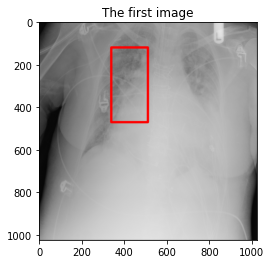

In [34]:
import cv2
image0 = cv2.imread('../input/data/images_001/images/00000032_037.png')
cv2.rectangle(image0, (int(list_df.iloc[0, 2:6][0]), int(list_df.iloc[0, 2:6][1])), (int(list_df.iloc[0, 2:6][0] + list_df.iloc[0, 2:6][2]), int(list_df.iloc[0, 2:6][1] + list_df.iloc[0, 2:6][3])), (255, 0, 0), 10)
plt.title('The first image')
plt.imshow(image0)

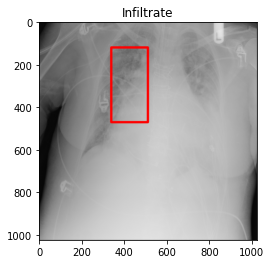

In [35]:
import cv2
image0 = cv2.imread(list_df.loc[0, 'path'])
cv2.rectangle(image0, (int(list_df.iloc[0, 2:6][0]), int(list_df.iloc[0, 2:6][1])), (int(list_df.iloc[0, 2:6][0] + list_df.iloc[0, 2:6][2]), int(list_df.iloc[0, 2:6][1] + list_df.iloc[0, 2:6][3])), (255, 0, 0), 10)
plt.title(list_df.loc[0, 'Finding Label'])
plt.imshow(image0)

Object Detections in Chest X-Ray


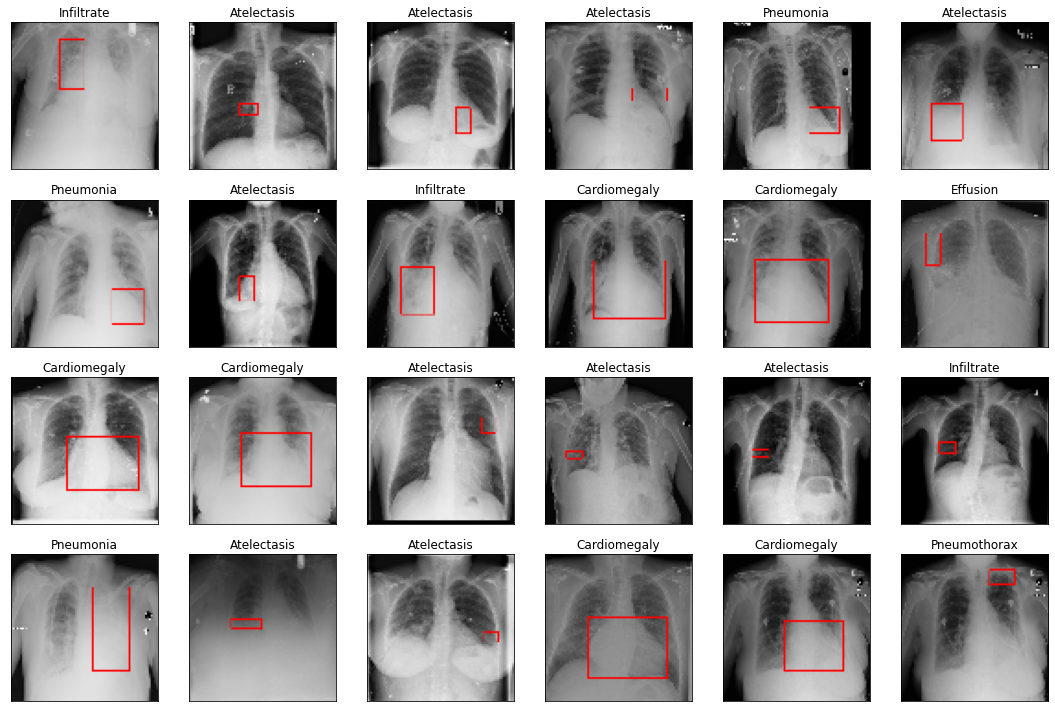

In [36]:
print("Object Detections in Chest X-Ray")
fig, axes = plt.subplots(nrows = 4, ncols = 6, figsize = (15, 10), subplot_kw = {'xticks':[], 'yticks':[]})
for i, ax in enumerate(axes.flat):
    img = cv2.imread(list_df.loc[i, 'path'])
    cv2.rectangle(img, (int(list_df.iloc[i, 2:6][0]), int(list_df.iloc[i, 2:6][1])), (int(list_df.iloc[i, 2:6][0] + list_df.iloc[i, 2:6][2]), int(list_df.iloc[i, 2:6][1] + list_df.iloc[i, 2:6][3])), (255, 0, 0), 10)
    img = cv2.resize(img, (80, 80))
    ax.imshow(img)
    ax.set_title(list_df.loc[i, 'Finding Label'])
fig.tight_layout()    

plt.show()

In [37]:
import torch
torch.__version__

'1.11.0'

In [38]:
torch.cuda.get_device_name(0)

'Tesla P100-PCIE-16GB'

In [39]:
import torchvision
torchvision.__version__

'0.12.0'

In [40]:
from PIL import Image
from torchvision import transforms

In [41]:
images = []
for i in range(len(list_df)):
    image_path = list_df.loc[i, 'path']
    image = Image.open(image_path)
    image = transforms.Compose([transforms.ToTensor() ])(image)
    images.append(image)

In [42]:
images[0:3]

[tensor([[[0.0157, 0.0275, 0.0275,  ..., 0.0863, 0.0941, 0.0549],
          [0.0353, 0.0549, 0.0588,  ..., 0.1765, 0.1882, 0.1137],
          [0.0353, 0.0549, 0.0549,  ..., 0.1725, 0.1804, 0.1059],
          ...,
          [0.3412, 0.6000, 0.5804,  ..., 0.0510, 0.0588, 0.0353],
          [0.3490, 0.6157, 0.5961,  ..., 0.0510, 0.0588, 0.0353],
          [0.1686, 0.2980, 0.2863,  ..., 0.0235, 0.0275, 0.0196]]]),
 tensor([[[0.8627, 0.8549, 0.8627,  ..., 0.6863, 0.8157, 0.4902],
          [0.8627, 0.8627, 0.8471,  ..., 0.6353, 0.7529, 0.4510],
          [0.8549, 0.8706, 0.8431,  ..., 0.6157, 0.7216, 0.4431],
          ...,
          [0.8118, 0.7882, 0.7882,  ..., 0.4392, 0.5490, 0.3294],
          [0.7922, 0.7922, 0.8078,  ..., 0.4510, 0.5529, 0.3373],
          [0.7961, 0.8039, 0.8118,  ..., 0.4510, 0.5373, 0.3294]]]),
 tensor([[[0.0000, 0.0000, 0.0000,  ..., 0.9412, 0.9451, 0.9569],
          [0.0000, 0.0000, 0.0000,  ..., 0.9294, 0.9451, 0.9529],
          [0.0000, 0.0000, 0.0000,  ...,

In [43]:
images[0].shape

torch.Size([1, 1024, 1024])

In [44]:
abnormal = []

for i in range(len(list_df)):
    if images[i].shape != torch.Size([1, 1024, 1024]):
        abnormal.append(i)
        
abnormal

[39, 66, 81, 259, 406]

In [45]:
images[39].shape

torch.Size([4, 1024, 1024])

In [46]:
len(images)

984

In [47]:
images = []
for i in range(len(list_df)):
    if (i != 39) & (i != 66) & (i != 81) & (i != 259) & (i != 406):
        image_path = list_df.loc[i, 'path']
        image = Image.open(image_path)
        image = transforms.Compose([transforms.ToTensor() ])(image)
        images.append(image)

In [48]:
abnormal = []

for i in range(len(images)):
    if images[i].shape != torch.Size([1, 1024, 1024]):
        abnormal.append(i)
        
abnormal

[]

In [49]:
boxes = []
for i in range(len(list_df)):
    if (i != 39) & (i != 66) & (i != 81) & (i != 259) & (i != 406):        
        box = [list_df.iloc[i, 2:6][0], list_df.iloc[i, 2:6][1], list_df.iloc[i, 2:6][0] + list_df.iloc[i, 2:6][2], list_df.iloc[i, 2:6][1] + list_df.iloc[i, 2:6][3]]
        boxes.append([box]) 
                                                                           
boxes = torch.tensor(boxes, dtype = torch.float32) 

In [50]:
boxes

tensor([[[339.1661, 119.1958, 511.4582, 470.2815]],

        [[356.5037, 567.8053, 484.3683, 650.1588]],

        [[617.6508, 599.2296, 718.4254, 779.1069]],

        ...,

        [[612.6934, 459.9846, 836.8356, 593.1046]],

        [[611.9538, 440.5096, 770.1049, 591.8341]],

        [[632.9492, 251.9684, 860.7458, 462.4091]]])

In [51]:
bbox_labels = [
 'Atelectasis',
 'Cardiomegaly',
 'Effusion',
 'Infiltrate',
 'Mass',
 'Nodule',
 'Pneumonia',
 'Pneumothorax']

labels = []
for i in range(len(list_df)):
    if (i != 39) & (i != 66) & (i != 81) & (i != 259) & (i != 406):        
        label = list_df.loc[i, 'Finding Label']
        label = bbox_labels.index(label)
        labels.append([label])
    
labels = torch.tensor(labels, dtype = torch.int64)

In [52]:
labels[0:5]

tensor([[3],
        [0],
        [0],
        [0],
        [6]])

In [53]:
dataset = []
for i in range(len(images)):
    data = (images[i], {'boxes': boxes[i], 'labels': labels[i]})
    dataset.append(data)

In [54]:
dataset[0:5]

[(tensor([[[0.0157, 0.0275, 0.0275,  ..., 0.0863, 0.0941, 0.0549],
           [0.0353, 0.0549, 0.0588,  ..., 0.1765, 0.1882, 0.1137],
           [0.0353, 0.0549, 0.0549,  ..., 0.1725, 0.1804, 0.1059],
           ...,
           [0.3412, 0.6000, 0.5804,  ..., 0.0510, 0.0588, 0.0353],
           [0.3490, 0.6157, 0.5961,  ..., 0.0510, 0.0588, 0.0353],
           [0.1686, 0.2980, 0.2863,  ..., 0.0235, 0.0275, 0.0196]]]),
  {'boxes': tensor([[339.1661, 119.1958, 511.4582, 470.2815]]),
   'labels': tensor([3])}),
 (tensor([[[0.8627, 0.8549, 0.8627,  ..., 0.6863, 0.8157, 0.4902],
           [0.8627, 0.8627, 0.8471,  ..., 0.6353, 0.7529, 0.4510],
           [0.8549, 0.8706, 0.8431,  ..., 0.6157, 0.7216, 0.4431],
           ...,
           [0.8118, 0.7882, 0.7882,  ..., 0.4392, 0.5490, 0.3294],
           [0.7922, 0.7922, 0.8078,  ..., 0.4510, 0.5529, 0.3373],
           [0.7961, 0.8039, 0.8118,  ..., 0.4510, 0.5373, 0.3294]]]),
  {'boxes': tensor([[356.5037, 567.8053, 484.3683, 650.1588]]),
  

In [55]:
len(dataset)

979

In [56]:
train, val, test = torch.utils.data.random_split(dataset = dataset, lengths = [900, 55, 24], generator = torch.Generator().manual_seed(42))

In [57]:
len(train), len(val), len(test)

(900, 55, 24)

In [58]:
train_loader = torch.utils.data.DataLoader(train, batch_size = 10, shuffle = False, drop_last = True)
val_loader = torch.utils.data.DataLoader(val, batch_size = 1)
test_loader = torch.utils.data.DataLoader(test, batch_size = 24)

In [59]:
from torchvision.utils import draw_bounding_boxes
from torchvision.models.detection.faster_rcnn import FastRCNNPredictor

index2name = ['Atelectasis', 'Cardiomegaly', 'Effusion', 'Infiltrate', 'Mass', 'Nodule', 'Pneumonia', 'Pneumothorax']
    
print(index2name)

name2index = {}
for i in range(len(index2name)):
    name2index[index2name[i]] = i
print(name2index)

['Atelectasis', 'Cardiomegaly', 'Effusion', 'Infiltrate', 'Mass', 'Nodule', 'Pneumonia', 'Pneumothorax']
{'Atelectasis': 0, 'Cardiomegaly': 1, 'Effusion': 2, 'Infiltrate': 3, 'Mass': 4, 'Nodule': 5, 'Pneumonia': 6, 'Pneumothorax': 7}


{'boxes': tensor([[[134.3661, 132.1989, 476.7831, 602.4804]],

        [[404.1820, 302.3238, 901.5535, 745.5153]],

        [[559.1365, 378.1757, 793.1937, 621.9852]],

        [[368.4233, 340.2497, 862.5439, 736.8466]],

        [[723.8434, 449.6931, 893.9683, 743.3481]],

        [[469.1979, 465.9471, 844.1227, 839.7883]],

        [[609.2800, 189.1935, 683.2355, 260.8735]],

        [[390.0952, 313.1598, 845.2064, 672.9143]],

        [[200.4656, 487.6190, 678.3323, 966.5693]],

        [[ 75.8519, 202.6328, 221.0540, 717.3418]]]), 'labels': tensor([[7],
        [1],
        [3],
        [1],
        [2],
        [6],
        [4],
        [1],
        [1],
        [7]])}
tensor([[[[0.1608, 0.1373, 0.1255,  ..., 0.5882, 0.5882, 0.5961],
          [0.1647, 0.1373, 0.1216,  ..., 0.4980, 0.5098, 0.5176],
          [0.1608, 0.1333, 0.1176,  ..., 0.4157, 0.4275, 0.4588],
          ...,
          [0.2314, 0.2471, 0.2510,  ..., 0.4980, 0.5059, 0.5216],
          [0.2353, 0.2471, 0.2549,  ..

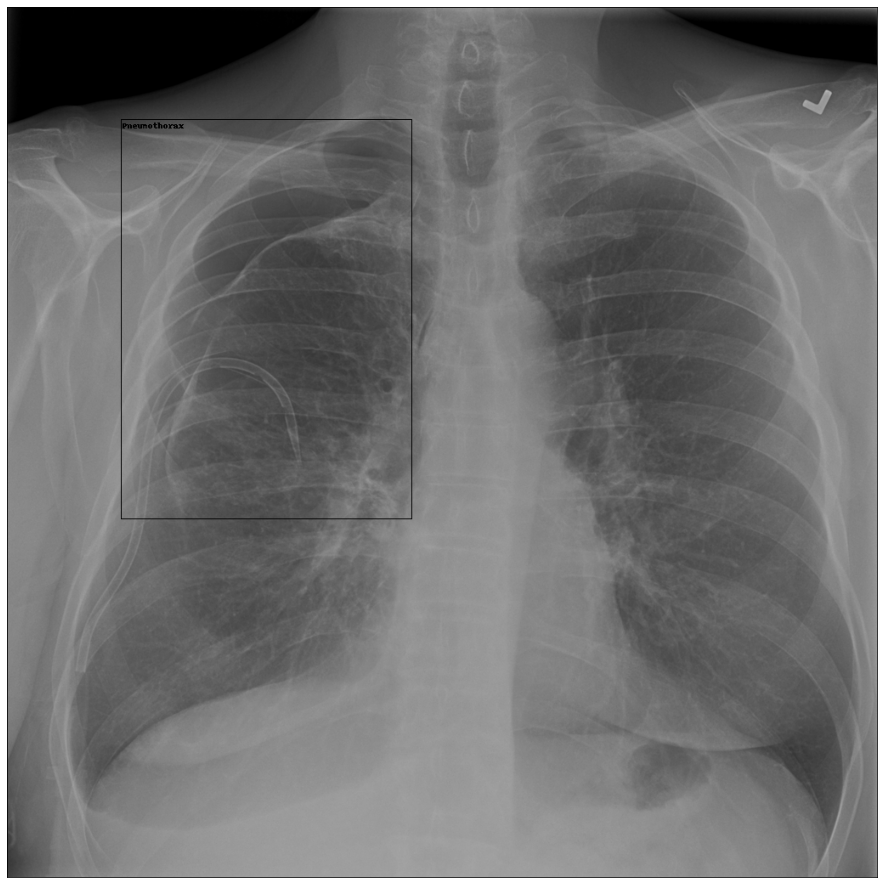

In [60]:
def show_boxes(image, boxes, names):
    drawn_boxes = draw_bounding_boxes(image, boxes, labels = names)

    plt.figure(figsize = (16, 16))
    plt.imshow(np.transpose(drawn_boxes, (1, 2, 0)))
    plt.tick_params(labelbottom = False, labelleft = False, bottom = False, left = False)
    plt.show()

dataiter = iter(train_loader)
image, target = next(dataiter)
print(target)

print(image)
image = image[0]
image = (image * 255).to(torch.uint8) 

boxes = target["boxes"][0]

labels = target["labels"][0]
names = [index2name[label.item()] for label in labels]

show_boxes(image, boxes, names)

In [61]:
import math
model = torchvision.models.detection.retinanet_resnet50_fpn(pretrained = True)

num_classes = len(index2name) + 1
num_anchors = model.head.classification_head.num_anchors

model.head.classification_head.num_classes = num_classes

cls_logits = torch.nn.Conv2d(256, num_anchors * num_classes, kernel_size = 3, stride = 1, padding = 1)
torch.nn.init.normal_(cls_logits.weight, std = 0.01)
torch.nn.init.constant_(cls_logits.bias, -math.log((1 - 0.01) / 0.01))
model.head.classification_head.cls_logits = cls_logits

model.cuda()

Downloading: "https://download.pytorch.org/models/retinanet_resnet50_fpn_coco-eeacb38b.pth" to /root/.cache/torch/hub/checkpoints/retinanet_resnet50_fpn_coco-eeacb38b.pth


  0%|          | 0.00/130M [00:00<?, ?B/s]

RetinaNet(
  (backbone): BackboneWithFPN(
    (body): IntermediateLayerGetter(
      (conv1): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
      (bn1): FrozenBatchNorm2d(64, eps=0.0)
      (relu): ReLU(inplace=True)
      (maxpool): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
      (layer1): Sequential(
        (0): Bottleneck(
          (conv1): Conv2d(64, 64, kernel_size=(1, 1), stride=(1, 1), bias=False)
          (bn1): FrozenBatchNorm2d(64, eps=0.0)
          (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
          (bn2): FrozenBatchNorm2d(64, eps=0.0)
          (conv3): Conv2d(64, 256, kernel_size=(1, 1), stride=(1, 1), bias=False)
          (bn3): FrozenBatchNorm2d(256, eps=0.0)
          (relu): ReLU(inplace=True)
          (downsample): Sequential(
            (0): Conv2d(64, 256, kernel_size=(1, 1), stride=(1, 1), bias=False)
            (1): FrozenBatchNorm2d(256, eps=0.0)


In [62]:
model.backbone.body.conv1

Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)

In [63]:
model.backbone.body.conv1.in_channels

3

In [64]:
model.backbone.body.conv1.in_channels = 1

In [65]:
model.backbone.body.conv1

Conv2d(1, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)

In [66]:
model.cuda()

RetinaNet(
  (backbone): BackboneWithFPN(
    (body): IntermediateLayerGetter(
      (conv1): Conv2d(1, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
      (bn1): FrozenBatchNorm2d(64, eps=0.0)
      (relu): ReLU(inplace=True)
      (maxpool): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
      (layer1): Sequential(
        (0): Bottleneck(
          (conv1): Conv2d(64, 64, kernel_size=(1, 1), stride=(1, 1), bias=False)
          (bn1): FrozenBatchNorm2d(64, eps=0.0)
          (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
          (bn2): FrozenBatchNorm2d(64, eps=0.0)
          (conv3): Conv2d(64, 256, kernel_size=(1, 1), stride=(1, 1), bias=False)
          (bn3): FrozenBatchNorm2d(256, eps=0.0)
          (relu): ReLU(inplace=True)
          (downsample): Sequential(
            (0): Conv2d(64, 256, kernel_size=(1, 1), stride=(1, 1), bias=False)
            (1): FrozenBatchNorm2d(256, eps=0.0)


In [67]:
params = [p for p in model.parameters() if p.requires_grad]
optimizer = torch.optim.SGD(params, lr = 0.005, momentum = 0.9, weight_decay = 0.0005)
epoch_number = []
train_losses = []
val_losses = []
model.train()
patience = 0
epochs = 3
batch_size = 10
loss_list = []
for epoch in range(epochs):
    
    train_loss = 0
    for i, (images, targets) in enumerate(train_loader):
        losses = 0
        for j in range(len(images)):

            image = images[j].unsqueeze(0).cuda()

            boxes = targets["boxes"][j].cuda()
            labels = targets["labels"][j].cuda()
            target = [{"boxes":boxes, "labels":labels}]

            loss_dic = model(image, target)
            loss = sum(loss for loss in loss_dic.values())
            losses += loss
            train_loss += loss.item()
            loss_list.append(loss)
            
        losses /= batch_size
        optimizer.zero_grad()
        losses.backward()
        optimizer.step()

        if i % 10 == 9:
            print("epoch:", epoch + 1,  "iteration:", i + 1,  "loss:", loss.item()) 
    train_losses.append(train_loss / ((i + 1) * batch_size))        
    print("train_loss:", train_loss / ((i + 1) * batch_size))

    val_loss = 0
    for i, (image, target) in enumerate(val_loader):

        image = image.cuda()

        boxes = target["boxes"][0].cuda()
        labels = target["labels"][0].cuda()
        target = [{"boxes":boxes, "labels":labels}]

        loss_dic = model(image, target)
        loss = sum(loss for loss in loss_dic.values())
        val_loss += loss.item()
    val_losses.append(val_loss / len(val))   
    print("val_loss:", val_loss / len(val))
    epoch_number.append(epoch + 1)
    if min(val_losses) < val_loss / len(val):
        patience += 1
                          
    if patience == 1:
        break

epoch: 1 iteration: 10 loss: 1.2610316276550293
epoch: 1 iteration: 20 loss: 1.5533398389816284
epoch: 1 iteration: 30 loss: 1.621256947517395
epoch: 1 iteration: 40 loss: 1.394527554512024
epoch: 1 iteration: 50 loss: 2.2935500144958496
epoch: 1 iteration: 60 loss: 0.6402407884597778
epoch: 1 iteration: 70 loss: 0.8789665699005127
epoch: 1 iteration: 80 loss: 1.0020052194595337
epoch: 1 iteration: 90 loss: 1.1897517442703247
train_loss: 1.4286010001103084
val_loss: 1.3569922512227839
epoch: 2 iteration: 10 loss: 0.6501713991165161
epoch: 2 iteration: 20 loss: 1.2065489292144775
epoch: 2 iteration: 30 loss: 1.1564688682556152
epoch: 2 iteration: 40 loss: 1.2498223781585693
epoch: 2 iteration: 50 loss: 2.113157272338867
epoch: 2 iteration: 60 loss: 0.3638911843299866
epoch: 2 iteration: 70 loss: 0.5145180821418762
epoch: 2 iteration: 80 loss: 1.0774962902069092
epoch: 2 iteration: 90 loss: 0.949677586555481
train_loss: 1.1697896979418065
val_loss: 1.2981084097515454
epoch: 3 iteration: 

In [68]:
# loss_list

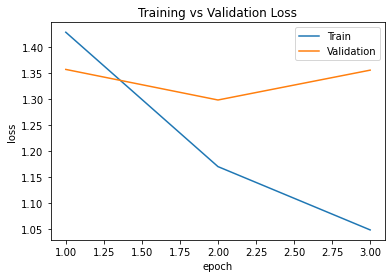

In [69]:
plt.plot(epoch_number, train_losses, label = "Training Loss")
plt.plot(epoch_number, val_losses, label = "Validation Loss")
plt.legend(['Train', 'Validation'], loc = 'upper right')
plt.title("Training vs Validation Loss")
plt.xlabel('epoch')
plt.ylabel('loss')

plt.show()

[{'boxes': tensor([[ 214.1915,  469.4491,  338.3200,  587.6950],
        [ 110.5103,  569.1546,  277.8504,  700.2938],
        [ 564.2211,  560.8464,  605.0668,  599.9695],
        [ 116.7789,  153.9963,  364.9975,  758.1198],
        [ 214.3547,  467.1713,  360.6121,  592.9971],
        [ 786.9423,  157.4282,  944.4310, 1022.9267],
        [  71.1778,  129.3561,  286.1035,  923.0840],
        [  40.4846,  519.9077,  144.4304,  917.5120],
        [ 223.7789,  236.1162,  393.2910,  378.7509],
        [  56.7404,  457.4728,  205.9935,  912.5970],
        [ 545.0627,  493.0181,  735.2748,  594.9030],
        [ 632.0081,  609.5038,  811.8461,  995.8237],
        [ 799.3318,  221.4725,  897.7923,  695.3350],
        [ 105.3364,  196.4814,  241.9320,  769.7274],
        [ 203.3290,  393.4156,  390.4169,  510.2223],
        [ 576.1123,  130.8445,  782.5975,  225.7521],
        [ 817.9465,  209.5629,  961.4056,  765.0948],
        [ 608.4310,  497.9195,  727.5045,  570.1102],
        [  85.819

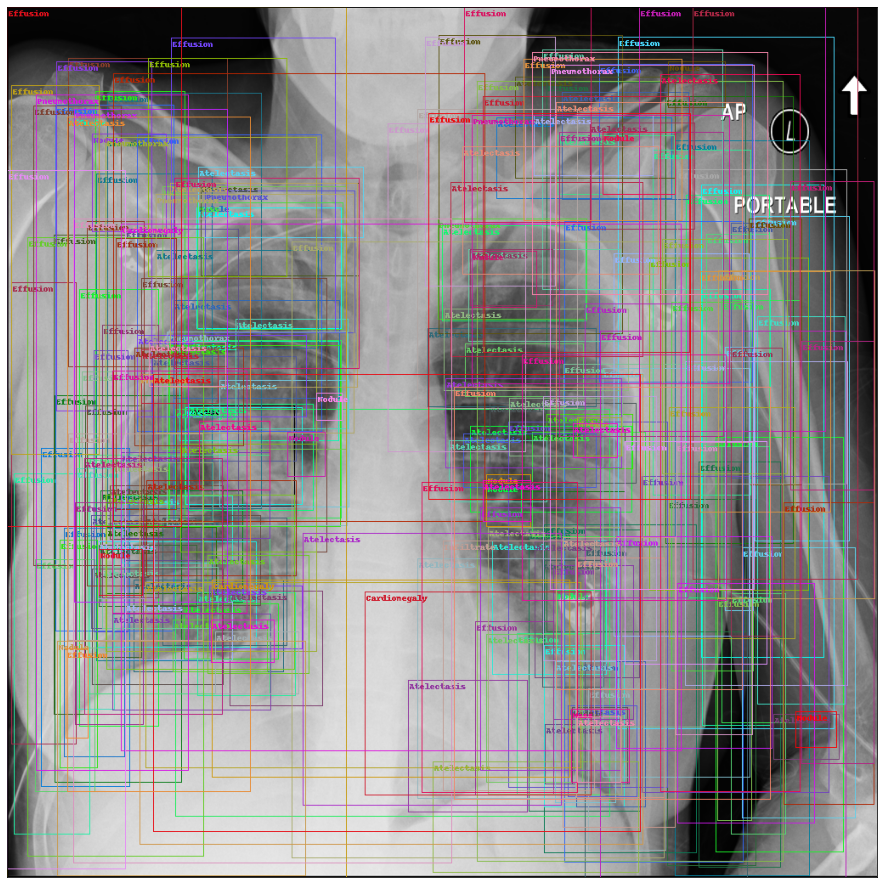

In [70]:
dataiter = iter(test_loader)
images, target = next(dataiter)

images = images.cuda()

model.eval()
predictions = model(images)
print(predictions)

image = (images[0] * 255).to(torch.uint8).cpu()
boxes = predictions[0]["boxes"].cpu()
labels = predictions[0]["labels"].cpu().detach().numpy()
labels = np.where(labels >= len(index2name), 0, labels)
names = [index2name[label.item()] for label in labels]

print(names)
show_boxes(image, boxes, names)

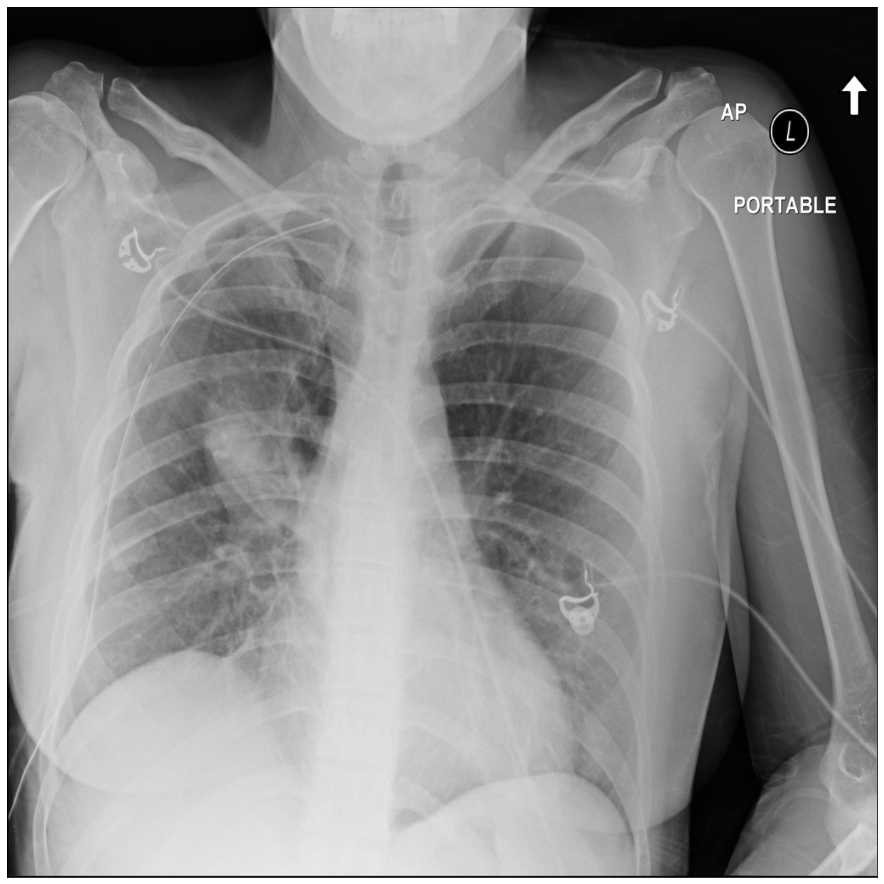

In [71]:
boxes = []
names = []
for i, box in enumerate(predictions[0]["boxes"]):
    score = predictions[0]["scores"][i].cpu().detach().numpy()
    if score > 0.5:
        boxes.append(box.cpu().tolist())
        label = predictions[0]["labels"][i].item()
        if label >= len(index2name):
            label = 0
        name = index2name[label]
        names.append(name)
boxes = torch.tensor(boxes)

show_boxes(image, boxes, names)

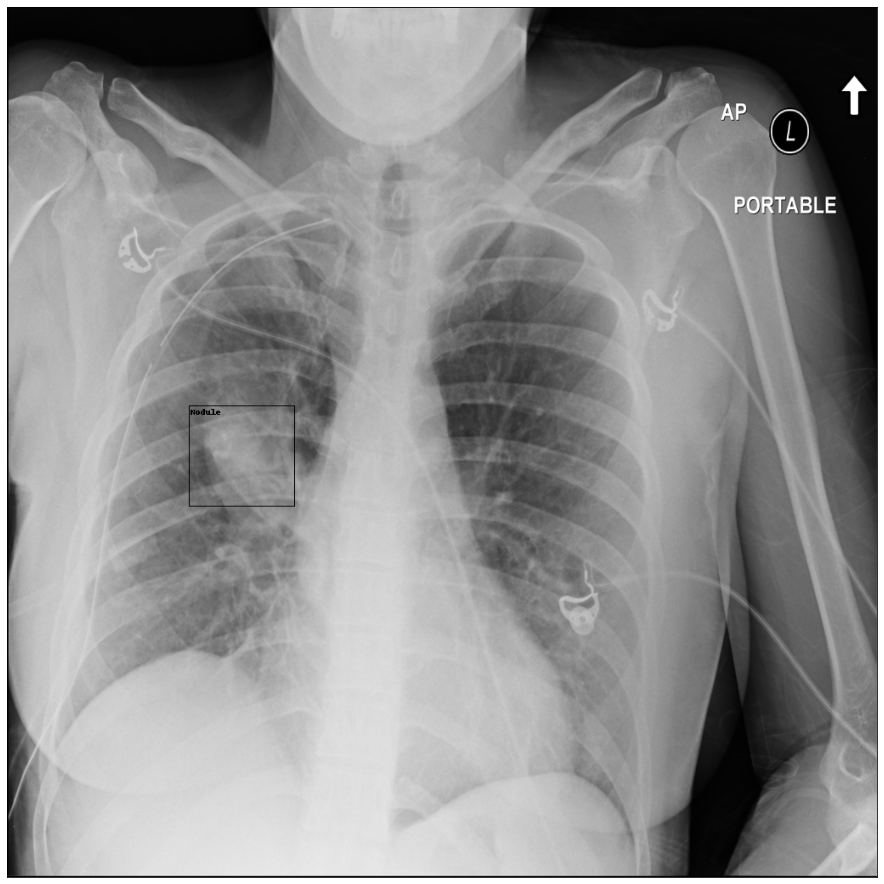

In [72]:
scores = []
boxes = []
names = []
for i, box in enumerate(predictions[0]["boxes"]):
    score = predictions[0]["scores"][i].cpu().detach().numpy()
    scores.append(score)
    
    if score == max(scores):
        boxes.append(box.cpu().tolist())
        label = predictions[0]["labels"][i].item()
        if label >= len(index2name):
            label = 0
        name = index2name[label]
        names.append(name)
boxes = torch.tensor(boxes)

show_boxes(image, boxes, names)

In [73]:
images

tensor([[[[0.0000, 0.0039, 0.0157,  ..., 0.0157, 0.0157, 0.0157],
          [0.0000, 0.0078, 0.0235,  ..., 0.0275, 0.0275, 0.0275],
          [0.0000, 0.0078, 0.0235,  ..., 0.0275, 0.0275, 0.0275],
          ...,
          [0.0000, 0.0275, 0.0902,  ..., 0.7137, 0.7020, 0.7294],
          [0.0000, 0.0392, 0.1294,  ..., 0.5529, 0.5608, 0.5804],
          [0.0000, 0.0000, 0.0000,  ..., 0.0000, 0.0000, 0.0000]]],


        [[[0.0157, 0.0275, 0.0275,  ..., 0.0863, 0.0941, 0.0549],
          [0.0353, 0.0549, 0.0588,  ..., 0.1765, 0.1882, 0.1137],
          [0.0353, 0.0549, 0.0549,  ..., 0.1725, 0.1804, 0.1059],
          ...,
          [0.3412, 0.6000, 0.5804,  ..., 0.0510, 0.0588, 0.0353],
          [0.3490, 0.6157, 0.5961,  ..., 0.0510, 0.0588, 0.0353],
          [0.1686, 0.2980, 0.2863,  ..., 0.0235, 0.0275, 0.0196]]],


        [[[0.0078, 0.0157, 0.0118,  ..., 0.0078, 0.0078, 0.0039],
          [0.0157, 0.0314, 0.0314,  ..., 0.0157, 0.0157, 0.0078],
          [0.0157, 0.0314, 0.0275,  ..

In [74]:
target

{'boxes': tensor([[[209.1344, 439.9407, 355.4201, 634.9883]],
 
         [[339.1661, 119.1958, 511.4582, 470.2815]],
 
         [[480.0339, 425.8540, 700.0042, 795.3608]],
 
         [[412.8508, 468.1143, 961.1513, 969.8201]],
 
         [[749.2267, 615.8602, 847.0756, 722.8113]],
 
         [[711.9238, 537.4645, 804.0296, 618.7344]],
 
         [[206.9672, 237.3079, 413.9344, 439.9407]],
 
         [[203.0933, 209.6735, 447.7155, 743.2913]],
 
         [[773.1200, 565.7979, 958.5778, 634.0646]],
 
         [[792.1100, 417.1852, 847.3735, 470.2815]],
 
         [[644.7407, 308.8254, 830.0359, 663.1619]],
 
         [[767.1873, 577.5577, 857.1259, 753.1005]],
 
         [[ 53.0963, 488.7026, 237.3079, 797.5280]],
 
         [[781.2740, 784.5248, 905.8878, 965.4857]],
 
         [[769.3545, 581.8921, 934.0614, 778.0233]],
 
         [[279.3244, 317.7624, 963.1289, 695.5046]],
 
         [[187.1644,  66.3135, 390.8267, 680.7135]],
 
         [[115.9450, 612.2328, 338.0826, 706.5058]],
 
 

In [75]:
"""
for i in range (24):
    print(f"Image{i}")
    image = (images[i] * 255).to(torch.uint8).cpu()
    boxes = predictions[i]["boxes"].cpu()
    labels = predictions[i]["labels"].cpu().detach().numpy()
    labels = np.where(labels >= len(index2name), 0, labels)
    names = [index2name[label.item()] for label in labels]

    print(names)
    show_boxes(image, boxes, names)
    
    scores = []
    boxes = []
    names = []
    for j, box in enumerate(predictions[i]["boxes"]):
        score = predictions[i]["scores"][j].cpu().detach().numpy()
        scores.append(score)

        if score == max(scores):
            boxes.append(box.cpu().tolist())
            label = predictions[i]["labels"][j].item()
            if label >= len(index2name):
                label = 0
            name = index2name[label]
            names.append(name)
    boxes = torch.tensor(boxes)

    show_boxes(image, boxes, names)
"""

'\nfor i in range (24):\n    print(f"Image{i}")\n    image = (images[i] * 255).to(torch.uint8).cpu()\n    boxes = predictions[i]["boxes"].cpu()\n    labels = predictions[i]["labels"].cpu().detach().numpy()\n    labels = np.where(labels >= len(index2name), 0, labels)\n    names = [index2name[label.item()] for label in labels]\n\n    print(names)\n    show_boxes(image, boxes, names)\n    \n    scores = []\n    boxes = []\n    names = []\n    for j, box in enumerate(predictions[i]["boxes"]):\n        score = predictions[i]["scores"][j].cpu().detach().numpy()\n        scores.append(score)\n\n        if score == max(scores):\n            boxes.append(box.cpu().tolist())\n            label = predictions[i]["labels"][j].item()\n            if label >= len(index2name):\n                label = 0\n            name = index2name[label]\n            names.append(name)\n    boxes = torch.tensor(boxes)\n\n    show_boxes(image, boxes, names)\n'

In [76]:
# dataiter = iter(test_loader)
# image, target = next(dataiter)

# image = image.cuda()

# model.eval()
# predictions = model(image)

# print(predictions)

In [77]:
for i in range(24):
    img, _ = test[i]

    img = (img * 255).to(torch.uint8).cpu()
    img = img.numpy()

    img = np.transpose(img, (1, 2, 0))
    
    scores = []
    boxes = []
    names = []
    for j, box in enumerate(predictions[i]["boxes"]):
        score = predictions[i]["scores"][j].cpu().detach().numpy()
        scores.append(score)

        if score == max(scores):
            boxes.append(box.cpu().tolist())
            label = predictions[i]["labels"][j].item()
            if label >= len(index2name):
                label = 0
            name = index2name[label]
            names.append(name)
    boxes = torch.tensor(boxes)
    print(scores)
    print(boxes)
    print(names)
    print(label)

[array(0.20298904, dtype=float32), array(0.19564578, dtype=float32), array(0.18897632, dtype=float32), array(0.1865821, dtype=float32), array(0.17030816, dtype=float32), array(0.16682775, dtype=float32), array(0.16663568, dtype=float32), array(0.16173549, dtype=float32), array(0.15682532, dtype=float32), array(0.15619996, dtype=float32), array(0.14367864, dtype=float32), array(0.14116916, dtype=float32), array(0.13768971, dtype=float32), array(0.13623616, dtype=float32), array(0.13598181, dtype=float32), array(0.13562728, dtype=float32), array(0.13144411, dtype=float32), array(0.13123937, dtype=float32), array(0.13045049, dtype=float32), array(0.12950128, dtype=float32), array(0.12940879, dtype=float32), array(0.12893775, dtype=float32), array(0.12885268, dtype=float32), array(0.126575, dtype=float32), array(0.12605354, dtype=float32), array(0.12568274, dtype=float32), array(0.12522596, dtype=float32), array(0.12406144, dtype=float32), array(0.12391026, dtype=float32), array(0.12328965

In [78]:
# dataiter = iter(test_loader)
# image, target = next(dataiter)

# image = image.cuda()

# model.eval()
# predictions = model(image)
# print(predictions)

Object Detections in Chest X-Ray (Prediction for Test Data)


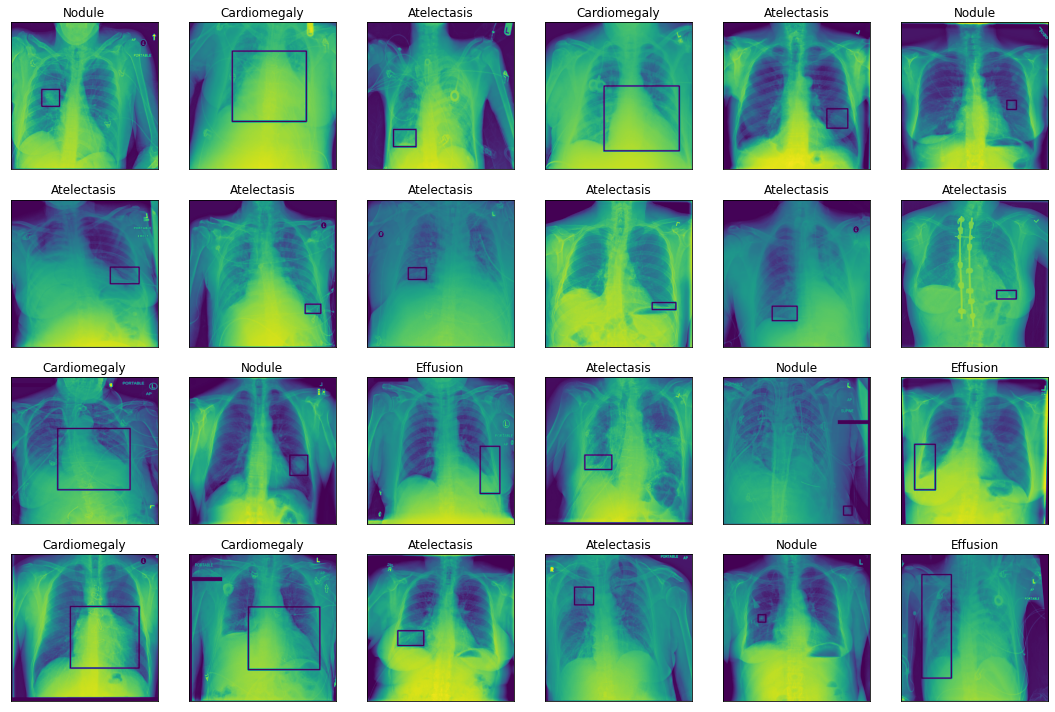

In [79]:
print("Object Detections in Chest X-Ray (Prediction for Test Data)")
fig, axes = plt.subplots(nrows = 4, ncols = 6, figsize = (15, 10), subplot_kw = {'xticks':[], 'yticks':[]})
for i, ax in enumerate(axes.flat):
    img, _ = test[i]

    img = (img * 255).to(torch.uint8).cpu()
    img = img.numpy()

    img = np.transpose(img, (1, 2, 0))
    
            
    scores = []
    boxes = []
    names = []
    for j, box in enumerate(predictions[i]["boxes"]):
        score = predictions[i]["scores"][j].cpu().detach().numpy()
        scores.append(score)

        if score == max(scores):
            boxes.append(box.cpu().tolist())
            label = predictions[i]["labels"][j].item()
            if label >= len(index2name):
                label = 0
            name = index2name[label]
            names.append(name)
    boxes = torch.tensor(boxes)
    
    if names != []:

        cv2.rectangle(img, (int(boxes[0][0].item()),\
                            int(boxes[0][1].item())),\
                      (int(boxes[0][2].item()),\
                       int(boxes[0][3].item())),\
                      (0, 0, 0), 10)

    ax.imshow(img)
    
    if names != []:
        ax.set_title(names[0])
    else:
        ax.set_title("No Finding")

fig.tight_layout()    

plt.show()

Object Detections in Chest X-Ray (Prediction for Test Data)


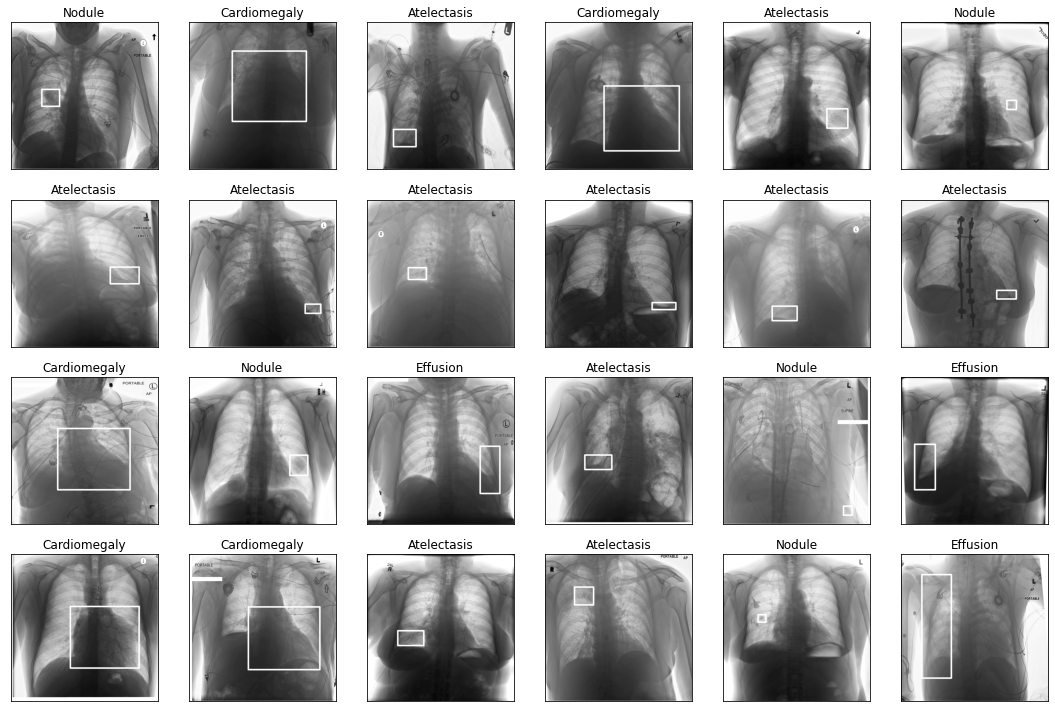

In [80]:
print("Object Detections in Chest X-Ray (Prediction for Test Data)")
fig, axes = plt.subplots(nrows = 4, ncols = 6, figsize = (15, 10), subplot_kw = {'xticks':[], 'yticks':[]})
for i, ax in enumerate(axes.flat):
    img, _ = test[i]

    img = (img * 255).to(torch.uint8).cpu()
    img = img.numpy()

    img = np.transpose(img, (1, 2, 0))
    
            
    scores = []
    boxes = []
    names = []
    for j, box in enumerate(predictions[i]["boxes"]):
        score = predictions[i]["scores"][j].cpu().detach().numpy()
        scores.append(score)

        if score == max(scores):
            boxes.append(box.cpu().tolist())
            label = predictions[i]["labels"][j].item()
            if label >= len(index2name):
                label = 0
            name = index2name[label]
            names.append(name)
    boxes = torch.tensor(boxes)
    
    if names != []:

        cv2.rectangle(img, (int(boxes[0][0].item()),\
                            int(boxes[0][1].item())),\
                      (int(boxes[0][2].item()),\
                       int(boxes[0][3].item())),\
                      (0, 0, 0), 10)

    ax.imshow(img, cmap = 'gray_r')
    
    if names != []:
        ax.set_title(names[0])
    else:
        ax.set_title("No Finding")

fig.tight_layout()    

plt.show()

Object Detections in Chest X-Ray (Truth for Test Data)


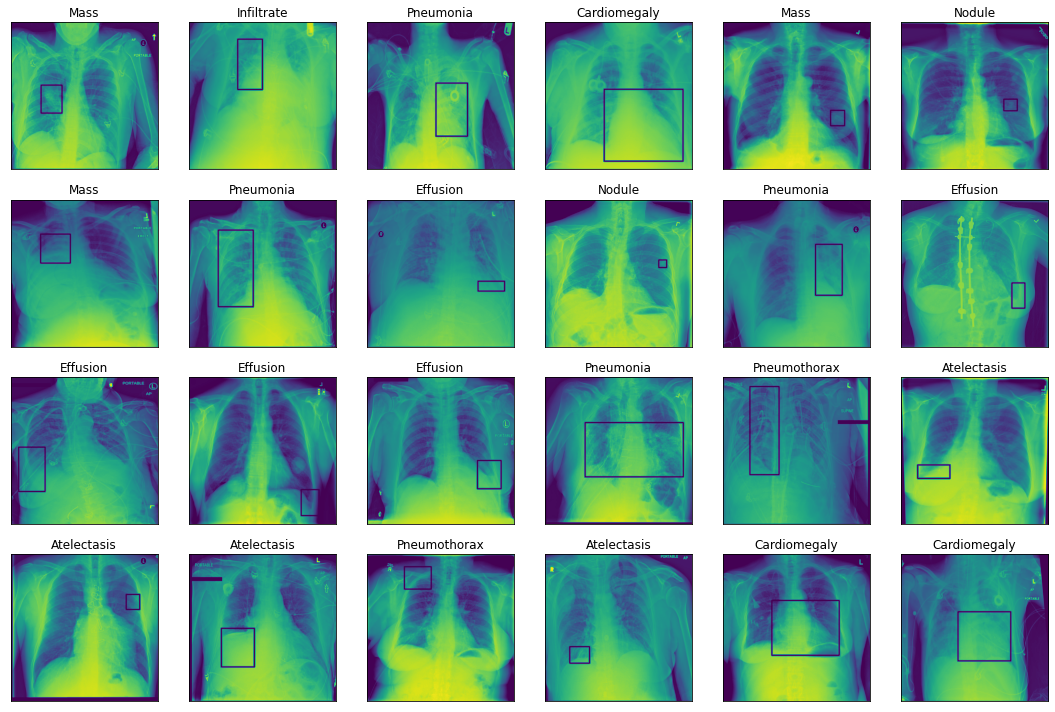

In [81]:
print("Object Detections in Chest X-Ray (Truth for Test Data)")
fig, axes = plt.subplots(nrows = 4, ncols = 6, figsize = (15, 10), subplot_kw = {'xticks':[], 'yticks':[]})
for i, ax in enumerate(axes.flat):
    img, t = test[i]

    img = (img * 255).to(torch.uint8).cpu()
    img = img.numpy()

    img = np.transpose(img, (1, 2, 0))
    
    cv2.rectangle(img, (int(t["boxes"][0][0].item()),\
                        int(t["boxes"][0][1].item())),\
                  (int(t["boxes"][0][2].item()),\
                   int(t["boxes"][0][3].item())),\
                  (0, 0, 0), 10)
    

    ax.imshow(img)
    ax.set_title(index2name[int(t["labels"][0].item())])
fig.tight_layout()    

plt.show()

Object Detections in Chest X-Ray (Truth for Test Data)


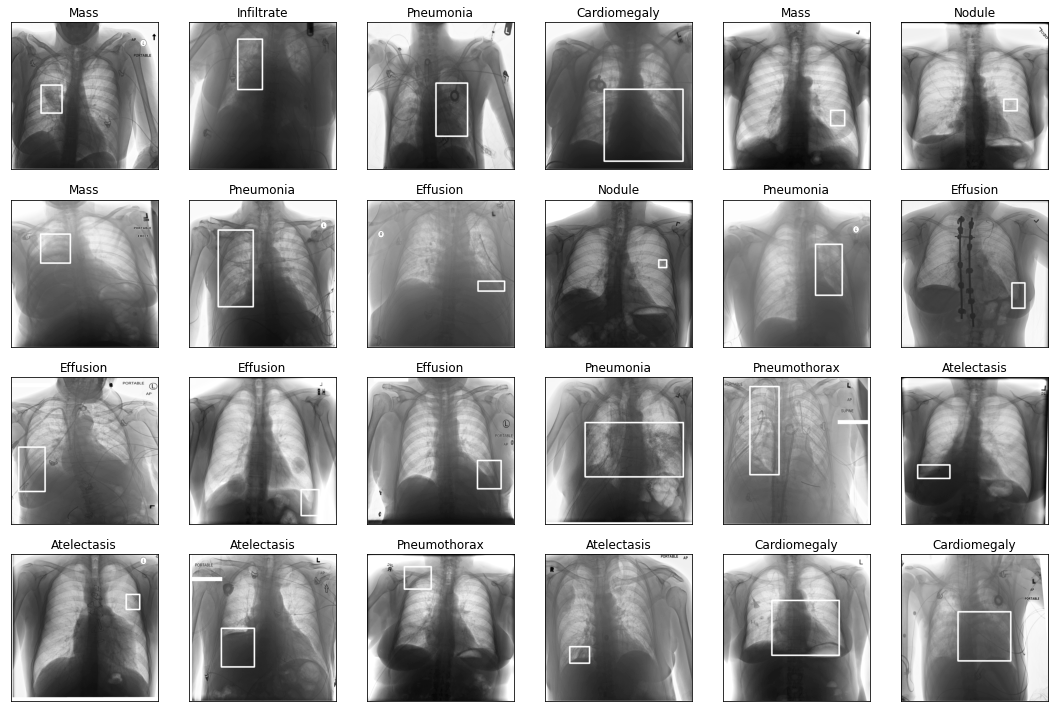

In [82]:
print("Object Detections in Chest X-Ray (Truth for Test Data)")
fig, axes = plt.subplots(nrows = 4, ncols = 6, figsize = (15, 10), subplot_kw = {'xticks':[], 'yticks':[]})
for i, ax in enumerate(axes.flat):
    img, t = test[i]

    img = (img * 255).to(torch.uint8).cpu()
    img = img.numpy()

    img = np.transpose(img, (1, 2, 0))
    
    cv2.rectangle(img, (int(t["boxes"][0][0].item()),\
                        int(t["boxes"][0][1].item())),\
                  (int(t["boxes"][0][2].item()),\
                   int(t["boxes"][0][3].item())),\
                  (0, 0, 0), 10)
    

    ax.imshow(img, cmap = 'gray_r')
    ax.set_title(index2name[int(t["labels"][0].item())])
fig.tight_layout()    

plt.show()

In [83]:
dataiter = iter(test_loader)
image, target = next(dataiter)
print(target)

print(image)

{'boxes': tensor([[[209.1344, 439.9407, 355.4201, 634.9883]],

        [[339.1661, 119.1958, 511.4582, 470.2815]],

        [[480.0339, 425.8540, 700.0042, 795.3608]],

        [[412.8508, 468.1143, 961.1513, 969.8201]],

        [[749.2267, 615.8602, 847.0756, 722.8113]],

        [[711.9238, 537.4645, 804.0296, 618.7344]],

        [[206.9672, 237.3079, 413.9344, 439.9407]],

        [[203.0933, 209.6735, 447.7155, 743.2913]],

        [[773.1200, 565.7979, 958.5778, 634.0646]],

        [[792.1100, 417.1852, 847.3735, 470.2815]],

        [[644.7407, 308.8254, 830.0359, 663.1619]],

        [[767.1873, 577.5577, 857.1259, 753.1005]],

        [[ 53.0963, 488.7026, 237.3079, 797.5280]],

        [[781.2740, 784.5248, 905.8878, 965.4857]],

        [[769.3545, 581.8921, 934.0614, 778.0233]],

        [[279.3244, 317.7624, 963.1289, 695.5046]],

        [[187.1644,  66.3135, 390.8267, 680.7135]],

        [[115.9450, 612.2328, 338.0826, 706.5058]],

        [[802.9460, 281.7354, 896.13

In [84]:
"""
for i in range(24):
    print(f"Image{i}")
    dataiter = iter(test_loader)
    image, target = next(dataiter)

    image = image[i]
    image = (image * 255).to(torch.uint8) 

    boxes = target["boxes"][i]

    labels = target["labels"][i]
    names = [index2name[label.item()] for label in labels]

    show_boxes(image, boxes, names)
"""

'\nfor i in range(24):\n    print(f"Image{i}")\n    dataiter = iter(test_loader)\n    image, target = next(dataiter)\n\n    image = image[i]\n    image = (image * 255).to(torch.uint8) \n\n    boxes = target["boxes"][i]\n\n    labels = target["labels"][i]\n    names = [index2name[label.item()] for label in labels]\n\n    show_boxes(image, boxes, names)\n'

In [85]:
boxes = []
scores = []
labels = []
for i in range(24):
    all_scores = []
    for j, box in enumerate(predictions[i]["boxes"]):
        score = predictions[i]["scores"][j].cpu().detach().numpy()
        all_scores.append(score)

        if score == max(all_scores):
            score = torch.tensor(score).item()
            scores.append(score)
            boxes.append(box.cpu().tolist())
            label = predictions[i]["labels"][j].item()
            if label >= len(index2name):
                label = 0
            labels.append(label)

print(boxes)
print(scores)
print(labels)

[[214.19149780273438, 469.4490661621094, 338.3200378417969, 587.6950073242188], [301.4761047363281, 202.59814453125, 817.2992553710938, 692.2713012695312], [184.01345825195312, 748.716552734375, 341.89617919921875, 868.5487060546875], [411.307373046875, 445.6363525390625, 935.2247924804688, 897.1260986328125], [723.8296508789062, 604.0007934570312, 869.3942260742188, 739.8195190429688], [732.1177368164062, 545.9097290039062, 798.5003662109375, 609.6998291015625], [691.8153686523438, 467.0540466308594, 892.5580444335938, 583.75927734375], [809.6992797851562, 725.6140747070312, 918.5407104492188, 789.9780883789062], [287.0899353027344, 471.7449645996094, 413.3194580078125, 553.4005126953125], [746.2598266601562, 714.0742797851562, 911.9395141601562, 763.5285034179688], [342.64599609375, 739.2190551757812, 516.7738037109375, 840.0709228515625], [662.5454711914062, 629.5874633789062, 797.14453125, 689.2860717773438], [325.3166809082031, 358.2749938964844, 829.3733520507812, 785.9189453125]

In [86]:
preds = [
  dict(
    boxes = torch.tensor(boxes),
    scores = torch.tensor(scores),
    labels = torch.tensor(labels),
  )
]

In [87]:
dataiter = iter(test_loader)
_, target = next(dataiter)
print(target["boxes"].squeeze(1))
print(target["labels"].squeeze(1))

tensor([[209.1344, 439.9407, 355.4201, 634.9883],
        [339.1661, 119.1958, 511.4582, 470.2815],
        [480.0339, 425.8540, 700.0042, 795.3608],
        [412.8508, 468.1143, 961.1513, 969.8201],
        [749.2267, 615.8602, 847.0756, 722.8113],
        [711.9238, 537.4645, 804.0296, 618.7344],
        [206.9672, 237.3079, 413.9344, 439.9407],
        [203.0933, 209.6735, 447.7155, 743.2913],
        [773.1200, 565.7979, 958.5778, 634.0646],
        [792.1100, 417.1852, 847.3735, 470.2815],
        [644.7407, 308.8254, 830.0359, 663.1619],
        [767.1873, 577.5577, 857.1259, 753.1005],
        [ 53.0963, 488.7026, 237.3079, 797.5280],
        [781.2740, 784.5248, 905.8878, 965.4857],
        [769.3545, 581.8921, 934.0614, 778.0233],
        [279.3244, 317.7624, 963.1289, 695.5046],
        [187.1644,  66.3135, 390.8267, 680.7135],
        [115.9450, 612.2328, 338.0826, 706.5058],
        [802.9460, 281.7354, 896.1354, 386.8445],
        [225.0847, 517.7311, 455.0508, 786.7480],


In [88]:
target = [
  dict(
    boxes = target["boxes"].squeeze(1),
    labels = target["labels"].squeeze(1),
  )
]

In [89]:
from torchmetrics.detection.mean_ap import MeanAveragePrecision
metric = MeanAveragePrecision(task = "multiclass", num_classes = 9, average = None)
metric.update(preds, target)
from pprint import pprint
pprint(metric.compute())

{'map': tensor(0.0515),
 'map_50': tensor(0.1968),
 'map_75': tensor(0.0140),
 'map_large': tensor(0.0516),
 'map_medium': tensor(0.1010),
 'map_per_class': tensor(-1.),
 'map_small': tensor(-1.),
 'mar_1': tensor(0.0108),
 'mar_10': tensor(0.0817),
 'mar_100': tensor(0.0817),
 'mar_100_per_class': tensor(-1.),
 'mar_large': tensor(0.0790),
 'mar_medium': tensor(0.1000),
 'mar_small': tensor(-1.)}


In [90]:
torch.save(model, 'object_detection_chestxray_pred_model.pth')

In [91]:
saved_model = torch.load('/kaggle/working/object_detection_chestxray_pred_model.pth')

In [92]:
saved_model

RetinaNet(
  (backbone): BackboneWithFPN(
    (body): IntermediateLayerGetter(
      (conv1): Conv2d(1, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
      (bn1): FrozenBatchNorm2d(64, eps=0.0)
      (relu): ReLU(inplace=True)
      (maxpool): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
      (layer1): Sequential(
        (0): Bottleneck(
          (conv1): Conv2d(64, 64, kernel_size=(1, 1), stride=(1, 1), bias=False)
          (bn1): FrozenBatchNorm2d(64, eps=0.0)
          (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
          (bn2): FrozenBatchNorm2d(64, eps=0.0)
          (conv3): Conv2d(64, 256, kernel_size=(1, 1), stride=(1, 1), bias=False)
          (bn3): FrozenBatchNorm2d(256, eps=0.0)
          (relu): ReLU(inplace=True)
          (downsample): Sequential(
            (0): Conv2d(64, 256, kernel_size=(1, 1), stride=(1, 1), bias=False)
            (1): FrozenBatchNorm2d(256, eps=0.0)
